# Lab.4: Part of Speech
## Introduction to Human Language Technologies
### Victor Badenas Crespo

***

### Statement:
- Consider Treebank corpus.
    - Train HMM, TnT, perceptron and CRF models using the first 500, 1000, 1500, 2000, 2500 and 3000 sentences.
    - Evaluate the resulting 24 models using sentences from 3001.
- Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).
    - Which model would you select? Justify the answer.

*** 

## Solution

Import necessary packages and declare environment valiables.

In [1]:
import nltk
import dill
import tqdm
import time
import pprint
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from nltk.corpus import treebank
from nltk.tag import CRFTagger
from nltk.tag import HiddenMarkovModelTrainer
from nltk.tag import PerceptronTagger
from nltk.tag import TnT
nltk.download('treebank')

MODELS_PATH = Path("./models")

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


Main training functions definition:
- saveModel will save the model to the indicated path
- evaluateModel runs .evaluate method of the object and returns the accuracy rounded.
- train<model> functions train a model of <model> kind and returns it

In [2]:
def saveModel(model, path):
    with open(path, "wb") as f:
        dill.dump(model, f)

def evaluateModel(testData, model, print_=True):
    acc = round(model.evaluate(testData), 3)
    if print_:
        print('accuracy: ' + str(acc))
    return acc

def trainHMM(trainData, modelPath):
    trainer = HiddenMarkovModelTrainer()
    HMM = trainer.train_supervised(trainData)
    saveModel(HMM, modelPath)
    return HMM

def trainTnT(trainData, modelPath):
    tnT = TnT()
    tnT.train(trainData)
    saveModel(tnT, modelPath)
    return tnT

def trainPerceptron(trainData, modelPath):
    PER = PerceptronTagger(load=False)
    PER.train(trainData)
    saveModel(PER, modelPath)
    return PER

def trainCRF(trainData, modelPath):
    CRF = CRFTagger()
    CRF.train(trainData, str(modelPath))
    return CRF


Create models dict and create folders and subfolders to store all models for future executions

In [3]:
models = {k:dict() for k in ("HMM", "TnT", "PER", "CRF")}
for model in models:
    Path(MODELS_PATH / model).mkdir(parents=True, exist_ok=True)

***

## Model Training
loops though the number of sentences and stores a model of each into the dictionary.

In [4]:
for numTrainingSentences in tqdm.tqdm(range(500, 3001, 500)):
    trainData = treebank.tagged_sents()[:numTrainingSentences]
    models['HMM'][numTrainingSentences] = trainHMM(trainData, MODELS_PATH / "HMM" / f'hmm_{numTrainingSentences}')
    models['TnT'][numTrainingSentences] = trainTnT(trainData, MODELS_PATH / "TnT" / f'tnt_{numTrainingSentences}')
    models['PER'][numTrainingSentences] = trainPerceptron(trainData, MODELS_PATH / "PER" / f'per_{numTrainingSentences}')
    models['CRF'][numTrainingSentences] = trainCRF(trainData, MODELS_PATH / "CRF" / f'crf_{numTrainingSentences}')
print()
pprint.pprint(models)

100%|██████████| 6/6 [02:55<00:00, 29.23s/it]
{'CRF': {500: <nltk.tag.crf.CRFTagger object at 0x000001F77F1FDF48>,
         1000: <nltk.tag.crf.CRFTagger object at 0x000001F704D3B248>,
         1500: <nltk.tag.crf.CRFTagger object at 0x000001F706D1C9C8>,
         2000: <nltk.tag.crf.CRFTagger object at 0x000001F7027EDE48>,
         2500: <nltk.tag.crf.CRFTagger object at 0x000001F70C6AB1C8>,
         3000: <nltk.tag.crf.CRFTagger object at 0x000001F70F6FC388>},
 'HMM': {500: <HiddenMarkovModelTagger 42 states and 3305 output symbols>,
         1000: <HiddenMarkovModelTagger 44 states and 5391 output symbols>,
         1500: <HiddenMarkovModelTagger 45 states and 6913 output symbols>,
         2000: <HiddenMarkovModelTagger 46 states and 8579 output symbols>,
         2500: <HiddenMarkovModelTagger 46 states and 9786 output symbols>,
         3000: <HiddenMarkovModelTagger 46 states and 10779 output symbols>},
 'PER': {500: <nltk.tag.perceptron.PerceptronTagger object at 0x000001F701172

***

## Inference and Evaluation

Necessary functions to load the models previously saved.

In [5]:
def loadDillModel(path):
    with open(path, "rb") as f:
        return dill.load(f)

def loadCrfModel(path):
    CRF = CRFTagger()
    CRF.set_model_file(str(path))
    return CRF

def loadModels():
    models = {k: dict() for k in ("HMM", "TnT", "PER", "CRF")}
    for numTrainingSentences in range(500, 3001, 500):
        models["HMM"][numTrainingSentences] = loadDillModel(MODELS_PATH / "HMM" / f'hmm_{numTrainingSentences}')
        models["TnT"][numTrainingSentences] = loadDillModel(MODELS_PATH / "TnT" / f'tnt_{numTrainingSentences}')
        models["PER"][numTrainingSentences] = loadDillModel(MODELS_PATH / "PER" / f'per_{numTrainingSentences}')
        models["CRF"][numTrainingSentences] = loadCrfModel(MODELS_PATH / "CRF" / f'crf_{numTrainingSentences}')
    return models

In [6]:
models = loadModels()
pprint.pprint(models)

{'CRF': {500: <nltk.tag.crf.CRFTagger object at 0x000001F70C791708>,
         1000: <nltk.tag.crf.CRFTagger object at 0x000001F70C899848>,
         1500: <nltk.tag.crf.CRFTagger object at 0x000001F711D75588>,
         2000: <nltk.tag.crf.CRFTagger object at 0x000001F71434AD08>,
         2500: <nltk.tag.crf.CRFTagger object at 0x000001F716A03EC8>,
         3000: <nltk.tag.crf.CRFTagger object at 0x000001F71891CFC8>},
 'HMM': {500: <HiddenMarkovModelTagger 42 states and 3305 output symbols>,
         1000: <HiddenMarkovModelTagger 44 states and 5391 output symbols>,
         1500: <HiddenMarkovModelTagger 45 states and 6913 output symbols>,
         2000: <HiddenMarkovModelTagger 46 states and 8579 output symbols>,
         2500: <HiddenMarkovModelTagger 46 states and 9786 output symbols>,
         3000: <HiddenMarkovModelTagger 46 states and 10779 output symbols>},
 'PER': {500: <nltk.tag.perceptron.PerceptronTagger object at 0x000001F70102E308>,
         1000: <nltk.tag.perceptron.Perc

Evaluation loop. for each model in the nested dictionaries, perform the evaluateModel function and store the acc metric.

In [7]:
testData = treebank.tagged_sents()[3000:]
testAcc = {k: dict() for k in ("HMM", "TnT", "PER", "CRF")}
for modelType, modelsDict in models.items():
    for sentenceSize, model in modelsDict.items():
        st = time.time()
        acc = evaluateModel(testData, model, print_=False)
        en = time.time()-st
        testAcc[modelType][sentenceSize] = acc
        print(f"{modelType} trained with {sentenceSize} sentences: {acc} ({en}s evaluation runtime)")

HMM trained with 500 sentences: 0.173 (5.407916307449341s evaluation runtime)
HMM trained with 1000 sentences: 0.221 (5.879578590393066s evaluation runtime)
HMM trained with 1500 sentences: 0.262 (6.060097932815552s evaluation runtime)
HMM trained with 2000 sentences: 0.304 (6.327004432678223s evaluation runtime)
HMM trained with 2500 sentences: 0.335 (6.480207681655884s evaluation runtime)
HMM trained with 3000 sentences: 0.368 (6.521550178527832s evaluation runtime)
TnT trained with 500 sentences: 0.747 (10.616580486297607s evaluation runtime)
TnT trained with 1000 sentences: 0.796 (27.2661349773407s evaluation runtime)
TnT trained with 1500 sentences: 0.827 (44.22500205039978s evaluation runtime)
TnT trained with 2000 sentences: 0.848 (55.868053674697876s evaluation runtime)
TnT trained with 2500 sentences: 0.862 (59.38956546783447s evaluation runtime)
TnT trained with 3000 sentences: 0.876 (62.30994439125061s evaluation runtime)
PER trained with 500 sentences: 0.912 (1.342200517654

The Accuracy data is then plotted using pandas built in subplot functionalities.

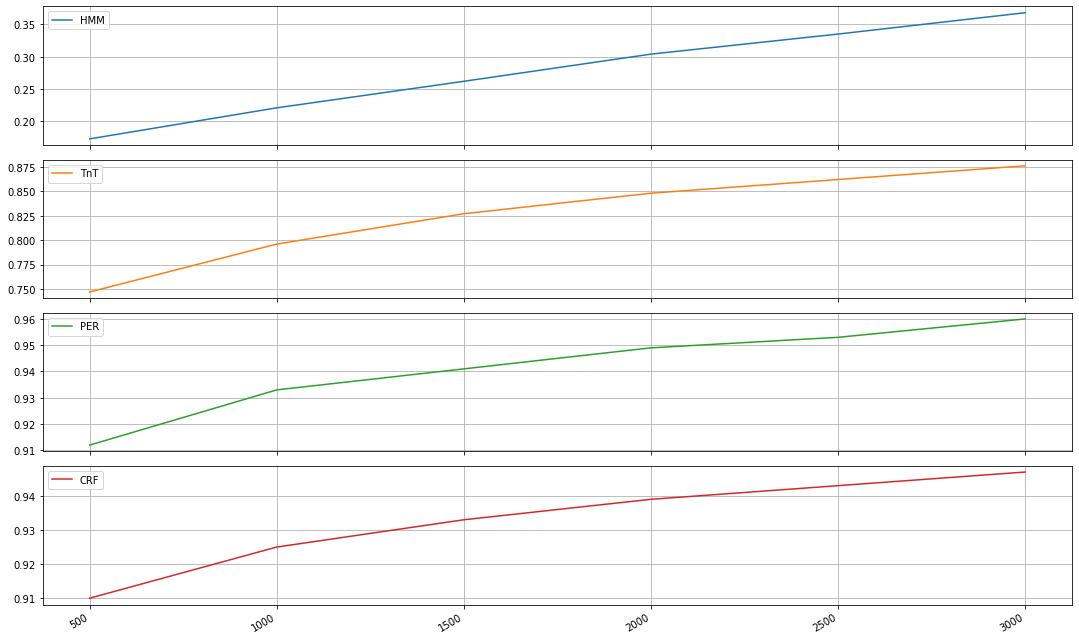

In [8]:
accDf = pd.DataFrame(testAcc)
accDf.to_csv("./test_accuracies.csv")
accDf.plot(subplots=True, figsize=(15, 9), grid='on')
plt.tight_layout()
plt.show()


***

## Conclusion

- Which model would you select? Justify the answer.

I would select the Perception trained with 3000 sentences, as it provides an accuracy of 95.5%. 
***